In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # pip install statsmodels
import numpy as np

# Task 2


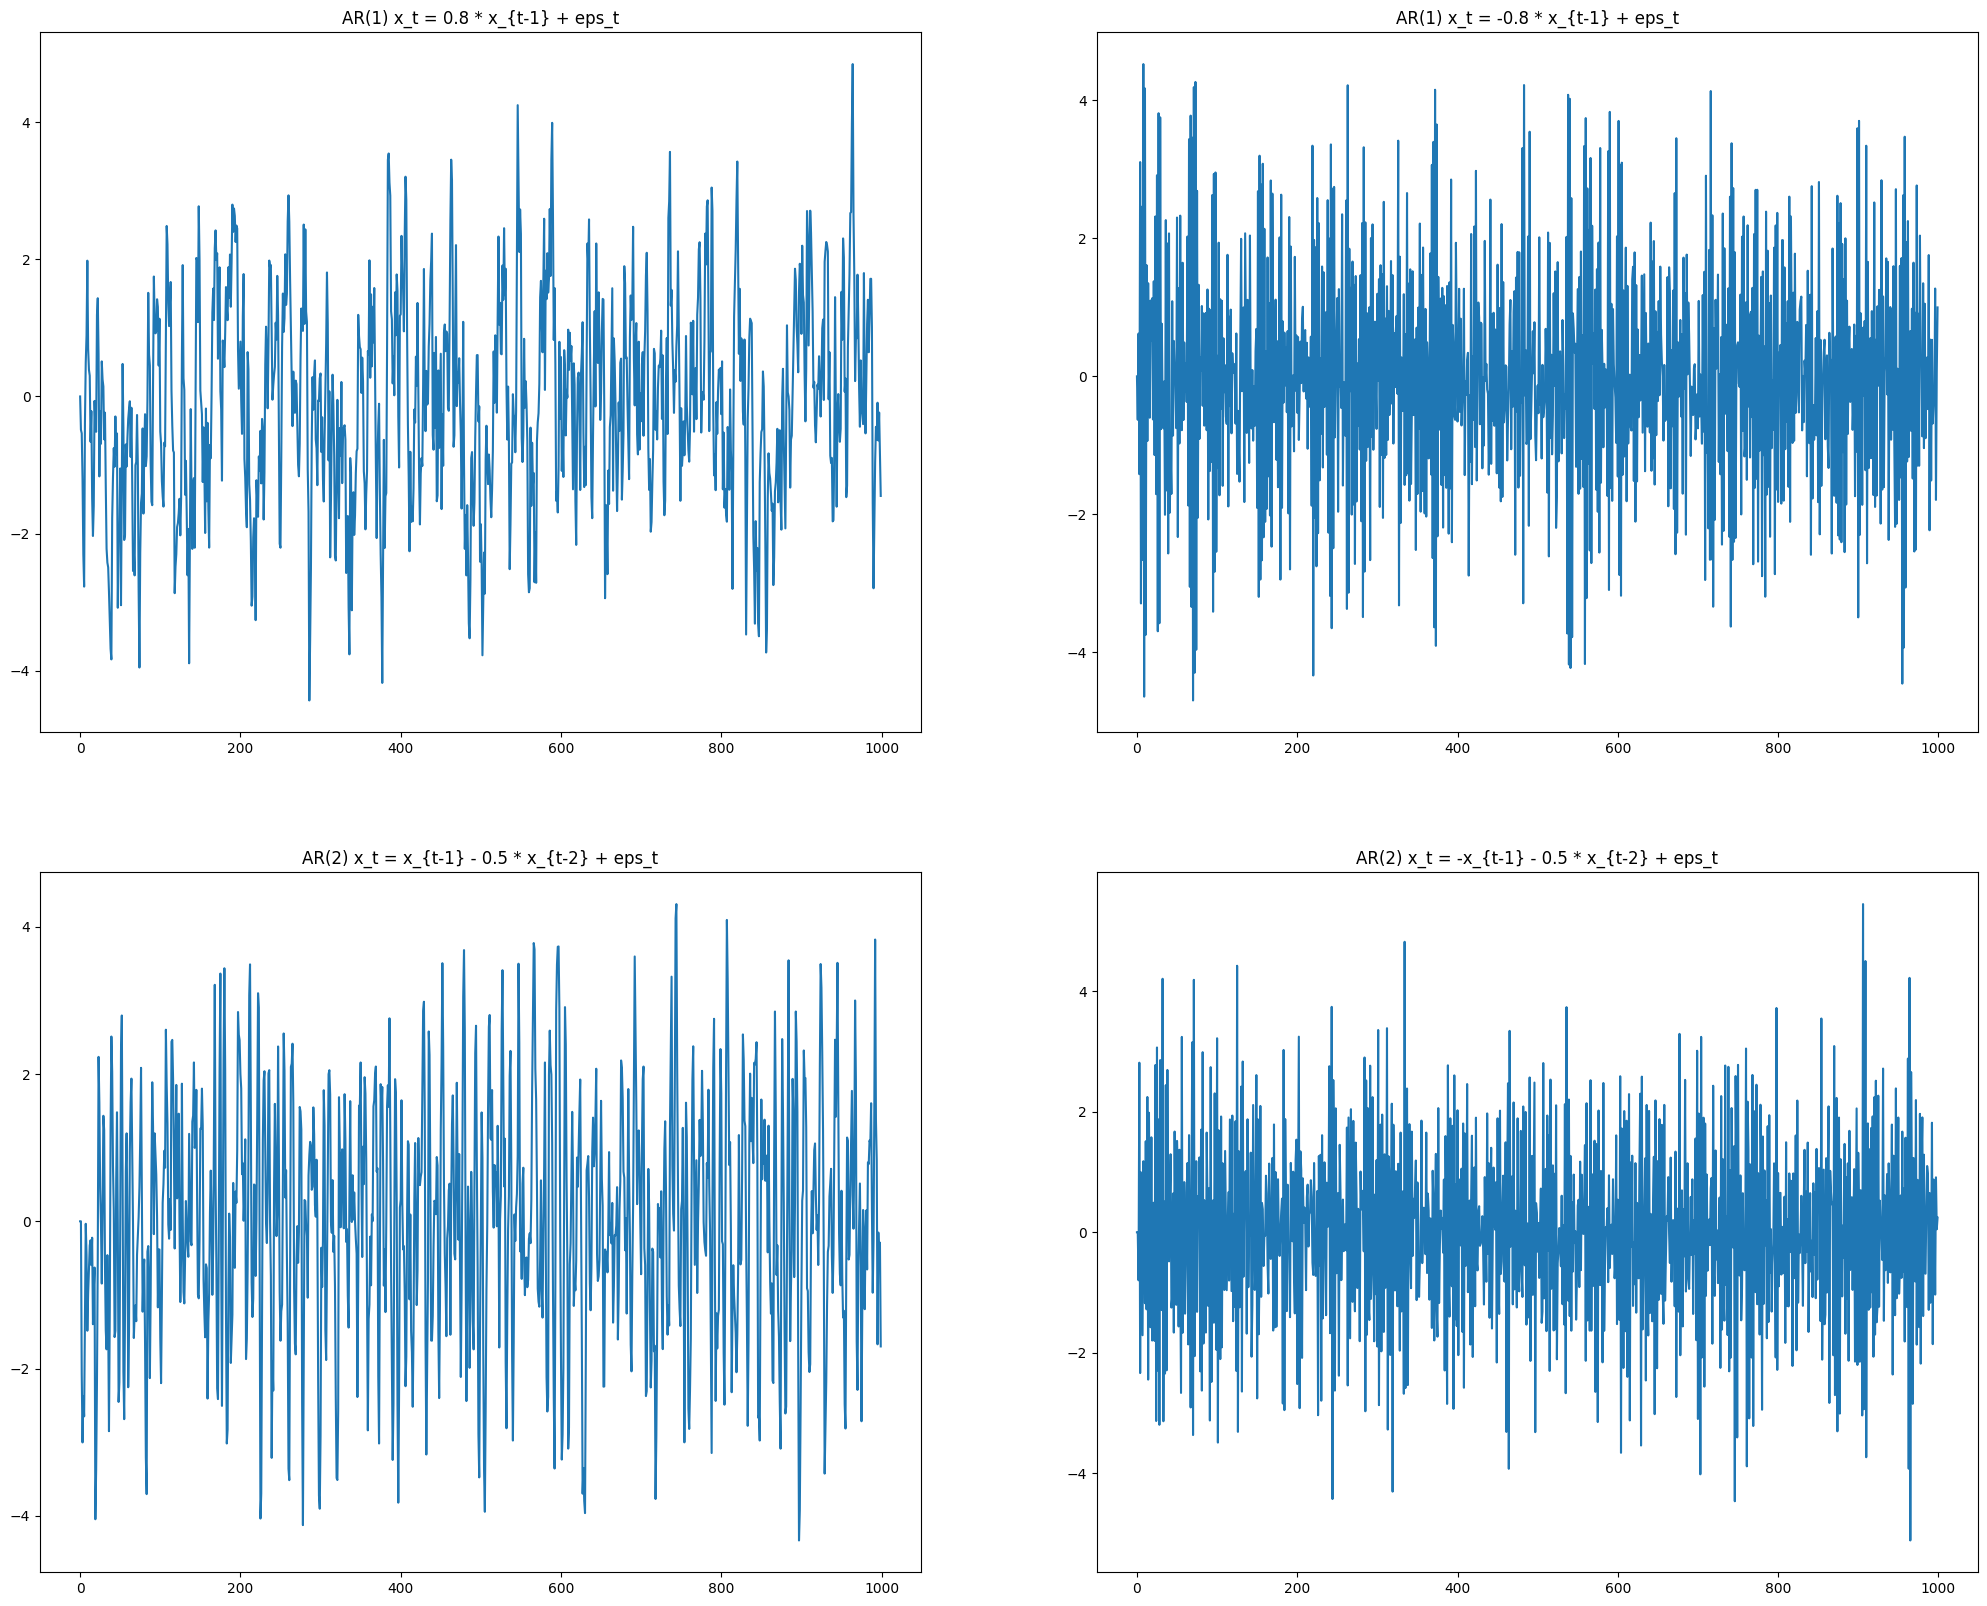

In [13]:
def draw_line_plots(all_series_titles):
    """
    all_series_titles; [(series1, title1), (series2, title2), ...]
    plot in 2 columns
    """
    n = len(all_series_titles)
    n_rows = n // 2 + n % 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(25, 10 * n_rows))
    for i, (series, title) in enumerate(all_series_titles):
        ax = axs[i // 2, i % 2]
        series.plot(ax=ax)
        ax.set_title(title)
    


#series 1: AR(1) x_t = 0.8 * x_{t-1} + eps_t
#series 2: AR(1) x_t = -0.8 * x_{t-1} + eps_t
#series 3: AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t
#series 4: AR(2) x_t = -x_{t-1} - 0.5 * x_{t-2} + eps_t
#eps_t ~ N(0, 1)
series1 = [0]
for i in range(1, 1000):
    series1.append(0.8 * series1[i-1] + np.random.normal(0, 1))
series1 = pd.Series(series1)


series2 = [0]
for i in range(1, 1000):
    series2.append(-0.8 * series2[i-1] + np.random.normal(0, 1))
series2 = pd.Series(series2)

series3 = [0, 0]
for i in range(2, 1000):
    series3.append(series3[i-1] - 0.5 * series3[i-2] + np.random.normal(0, 1))
series3 = pd.Series(series3)

series4 = [0, 0]
for i in range(2, 1000):
    series4.append(-series4[i-1] - 0.5 * series4[i-2] + np.random.normal(0, 1))
series4 = pd.Series(series4)


draw_line_plots([(series1,"AR(1) x_t = 0.8 * x_{t-1} + eps_t"), (series2,"AR(1) x_t = -0.8 * x_{t-1} + eps_t"), (series3,"AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t"), (series4,"AR(2) x_t = -x_{t-1} - 0.5 * x_{t-2} + eps_t")])


All of them are stationary as they match the stationarity criterion from task 1. The line plot proves it too.

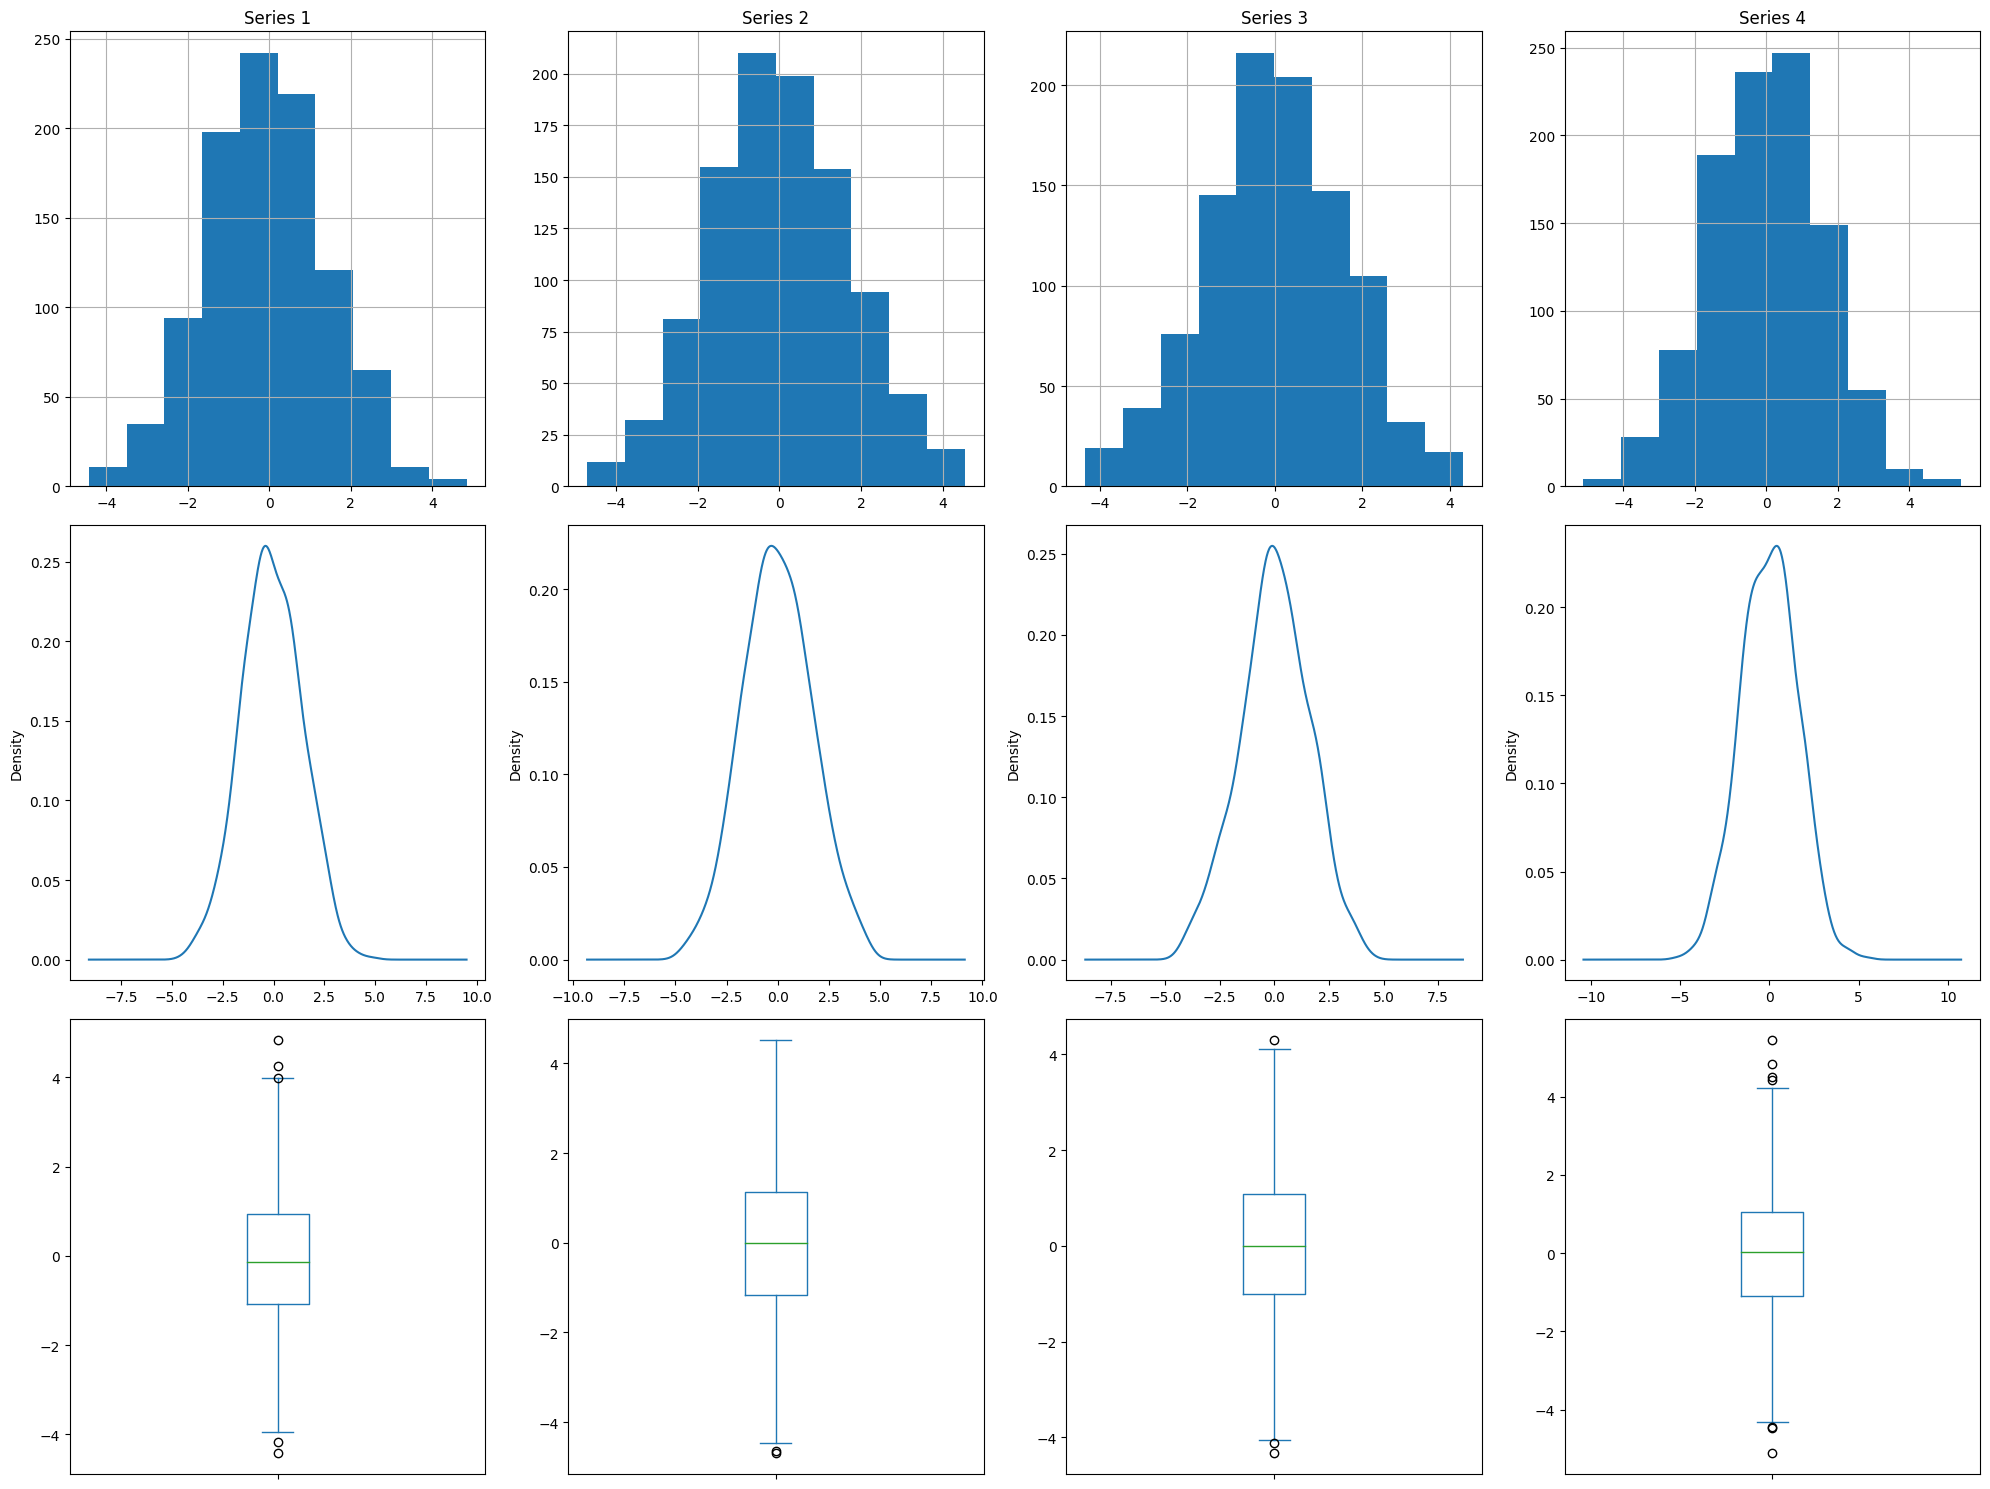

In [14]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
series = [series1, series2, series3, series4]
titles = ['Series 1', 'Series 2', 'Series 3', 'Series 4']  # Add the titles for each column

for i in range(4):
    axs[0, i].set_title(titles[i])  # Set the title for the top subplot in each column
    series[i].hist(ax=axs[0, i])
    series[i].plot(kind='kde', ax=axs[1, i])
    series[i].plot(kind='box', ax=axs[2, i])

plt.tight_layout()
plt.show()

Yes there are some outliers, as shown by the box-plot. The histogram and the density plot do not give us many information though.

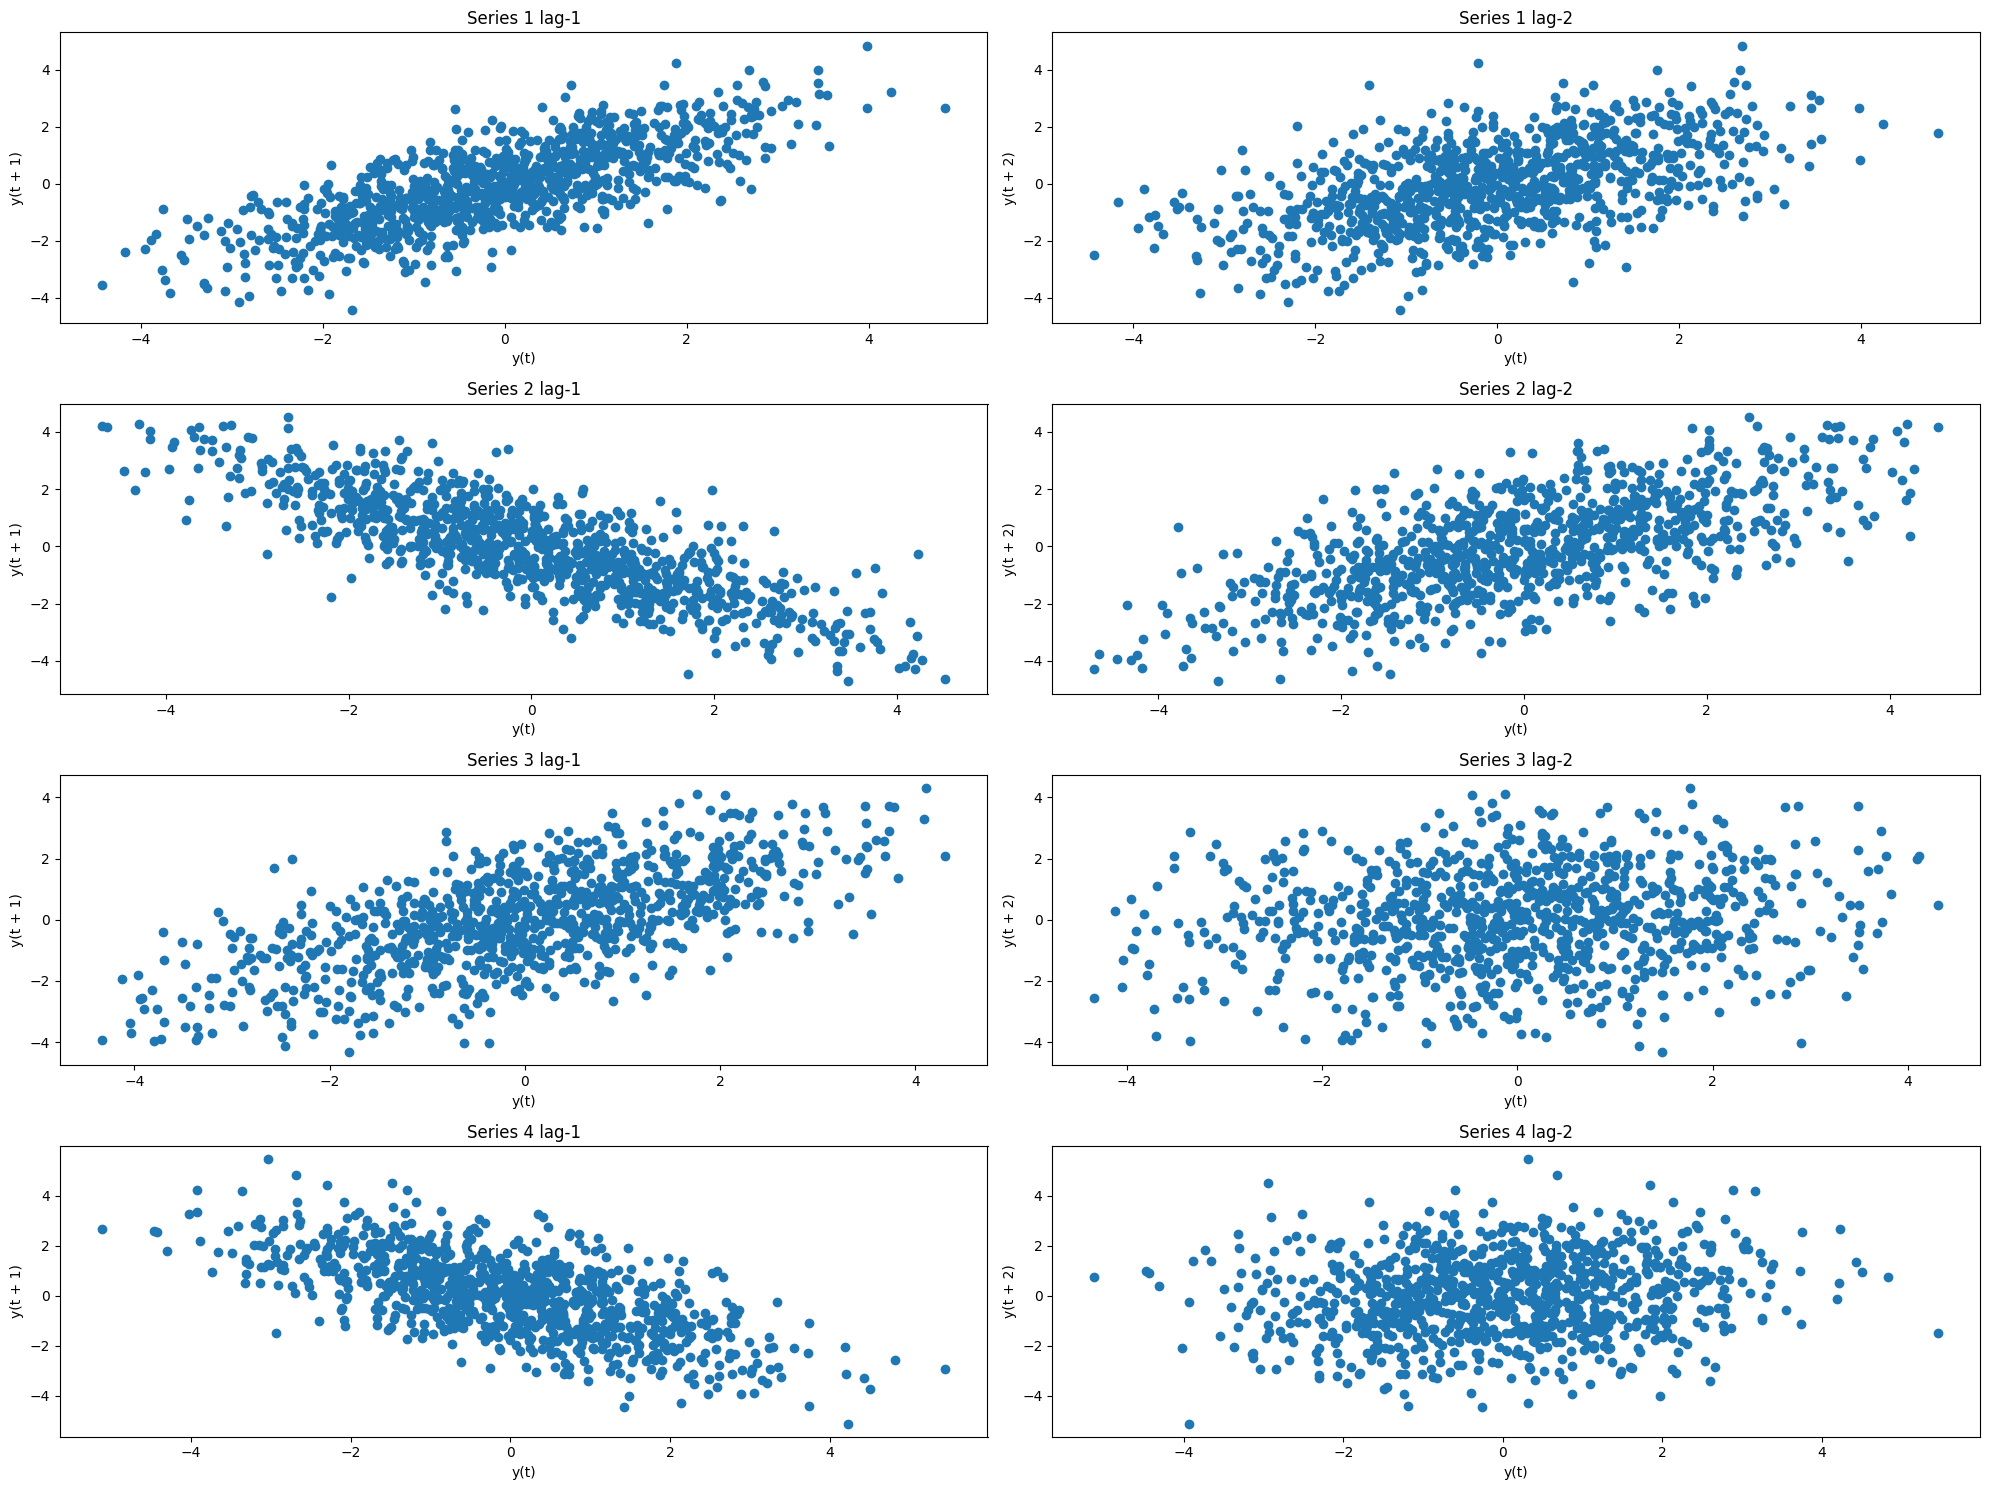

In [15]:
# draw lag-1 and lag-2 plots
fig, axs = plt.subplots(4, 2, figsize=(20, 15))
for i in range(4):
    pd.plotting.lag_plot(series[i], lag=1, ax=axs[i, 0])
    pd.plotting.lag_plot(series[i], lag=2, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' lag-1')
    axs[i, 1].set_title(titles[i] + ' lag-2')
plt.tight_layout()
plt.show()

It looks pretty random, there is no clear pattern.

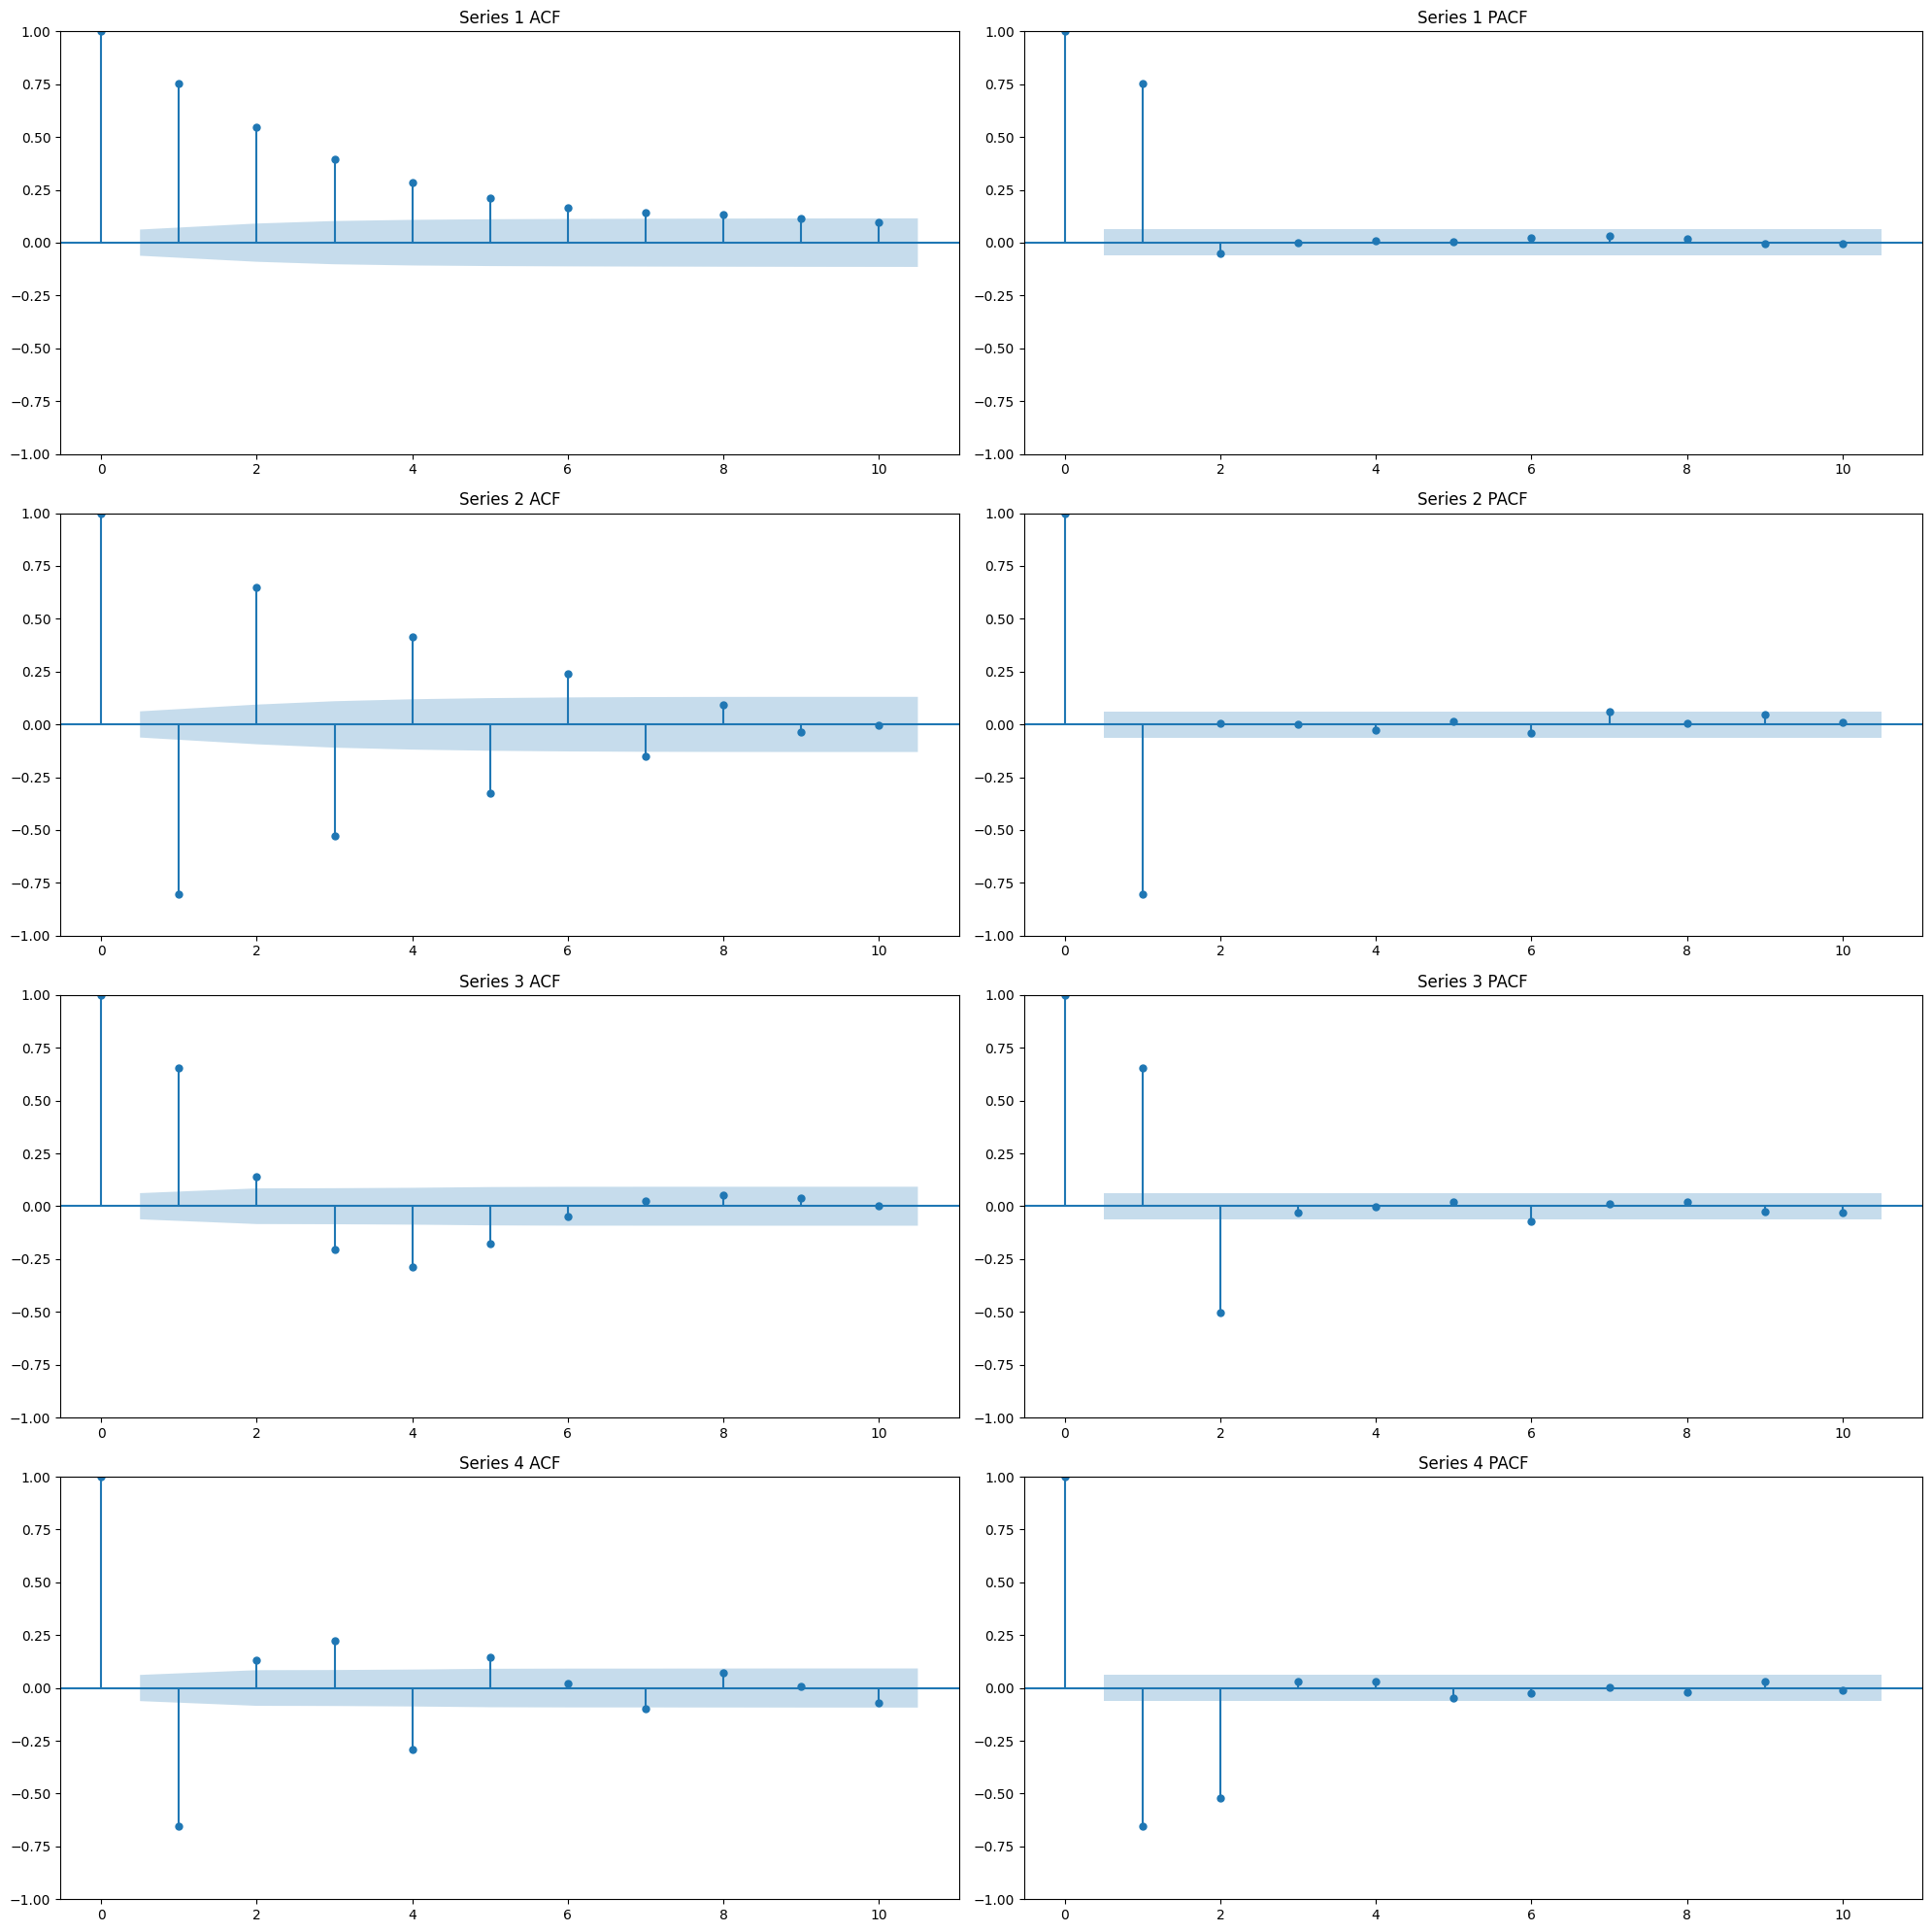

In [16]:
# Draw ACF and PACF plots for each series
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i in range(4):
    sm.graphics.tsa.plot_acf(series[i], lags=10, ax=axs[i, 0])
    sm.graphics.tsa.plot_pacf(series[i], lags=10, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' ACF')
    axs[i, 1].set_title(titles[i] + ' PACF')
    
plt.tight_layout()
plt.show()